# ANALYSIS USING FEATURE SELECTION AND MACHINE LEARNING ALGORITHMS

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from lightgbm import LGBMRegressor
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [204]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [205]:
pip install xgboost

In [208]:
df = pd.read_csv("improved_ecommerce_dataset.csv")

## Exploratory Data Analysis (EDA)

In [211]:
df.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
0,Stationery,Faber-Castell,Notebook,1,Used,102,52,Low,0,11,28,1.02,370.48
1,Clothes,Uniqlo,Jeans,4,Used,372,24,High,0,6,2,14.88,2788.69
2,Clothes,Adidas,Jacket,4,New,276,33,High,0,10,11,11.04,9658.62
3,Clothes,Nike,Hoodie,4,New,58,42,Medium,0,12,27,2.32,2444.37
4,Phone,Tecno,Redmi Note 11,5,Used,562,55,Medium,6,5,2,28.10,410332.57


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            500 non-null    object 
 1   Brand               500 non-null    object 
 2   Product_Name        500 non-null    object 
 3   Rating              500 non-null    int64  
 4   Condition           500 non-null    object 
 5   Num_Reviews         500 non-null    int64  
 6   Stock               500 non-null    int64  
 7   Material_Quality    500 non-null    object 
 8   Warranty_Months     500 non-null    int64  
 9   Delivery_Time_Days  500 non-null    int64  
 10  Discount_Percent    500 non-null    int64  
 11  Popularity_Score    500 non-null    float64
 12  Price               500 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 50.9+ KB


In [215]:
df.describe()

,Rating,Num_Reviews,Stock,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,2.994000,507.642000,47.646000,4.21800,7.280000,24.216000,15.179800,64965.637060
std,1.413492,290.829878,29.645478,7.33936,3.954349,14.450293,12.094746,117200.765227
min,1.000000,2.000000,1.000000,0.00000,1.000000,0.000000,0.020000,370.480000
25%,2.000000,252.000000,21.000000,0.00000,4.000000,11.000000,5.520000,2518.965000
50%,3.000000,524.000000,47.000000,0.00000,7.000000,25.000000,11.580000,10643.535000
75%,4.000000,766.500000,74.000000,6.00000,11.000000,36.000000,22.710000,45812.545000
max,5.000000,998.000000,99.000000,24.00000,14.000000,49.000000,48.700000,583894.830000


In [217]:
df.columns

Index(['Category', 'Brand', 'Product_Name', 'Rating', 'Condition', 'Num_Reviews', 'Stock', 'Material_Quality', 'Warranty_Months', 'Delivery_Time_Days', 'Discount_Percent', 'Popularity_Score', 'Price'], dtype='object')

In [219]:
df["Category"].unique()

array(['Stationery', 'Clothes', 'Phone', 'Utensils'], dtype=object)

In [221]:
df["Brand"].unique()

array(['Faber-Castell', 'Uniqlo', 'Adidas', 'Nike', 'Tecno', 'Samsung',
       'Pilot', 'Hawkins', 'Pigeon', 'Bic', 'Tefal', 'Cuisinart', 'Zara',
       'Prestige', 'H&M', 'Paper Mate', 'Xiaomi', 'Infinix', 'Staples',
       'Apple'], dtype=object)

In [223]:
df["Product_Name"].unique()

array(['Notebook', 'Jeans', 'Jacket', 'Hoodie', 'Redmi Note 11', 'Ruler',
       'Frying Pan', 'Cooking Pot', 'Stapler', 'Ball Pen', 'Kettle',
       'T-Shirt', 'Camon 20', 'Marker', 'Hot 30', 'Cutlery Set',
       'Pressure Cooker', 'Sneakers', 'Galaxy A23', 'iPhone 13'],
      dtype=object)

In [225]:
df["Condition"].unique()

array(['Used', 'New'], dtype=object)

In [227]:
df["Material_Quality"].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [229]:
df.isnull().sum()

Category              0
Brand                 0
Product_Name          0
Rating                0
Condition             0
Num_Reviews           0
Stock                 0
Material_Quality      0
Warranty_Months       0
Delivery_Time_Days    0
Discount_Percent      0
Popularity_Score      0
Price                 0
dtype: int64

In [231]:
df.duplicated().sum()

0

In [233]:
df.shape

(500, 13)

# Visualization and Explanations.

### Distribution Plots of Key Numerical Features

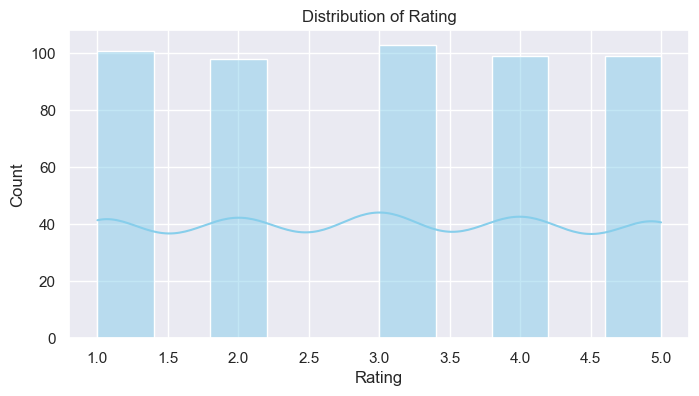

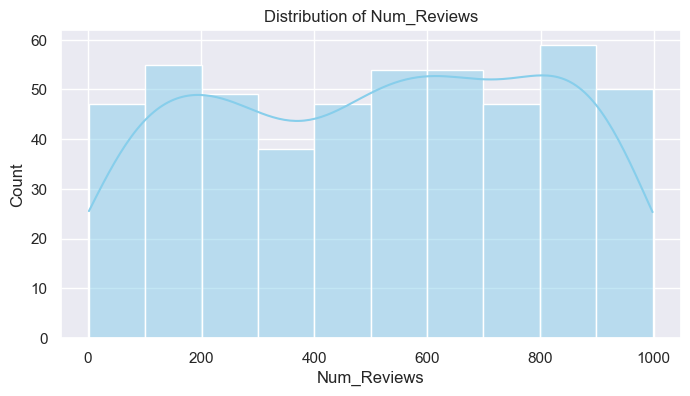

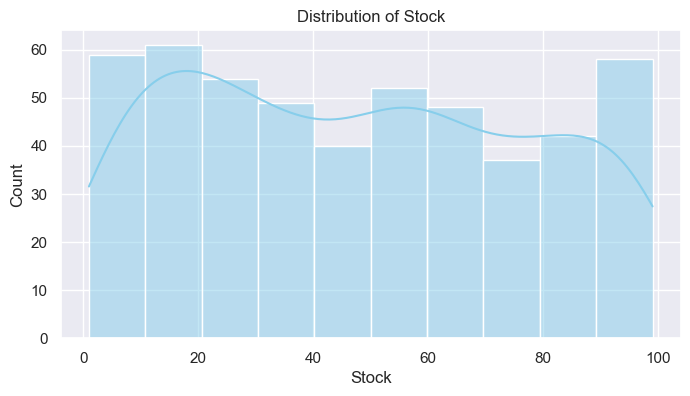

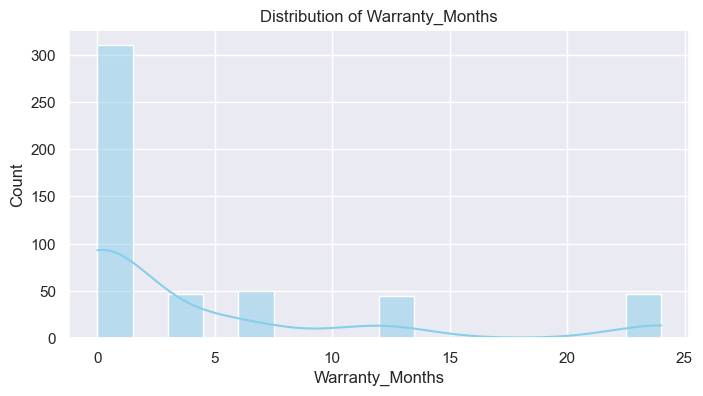

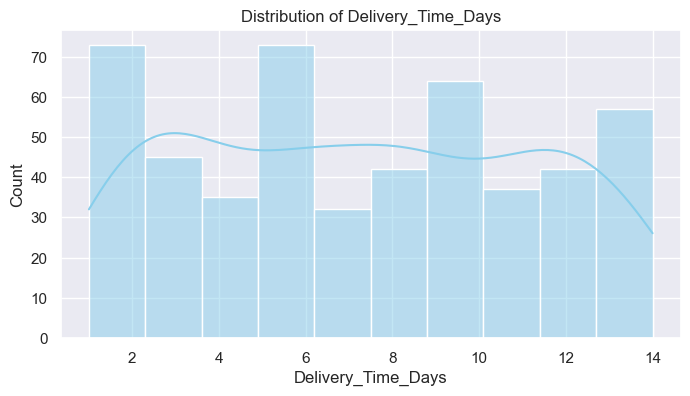

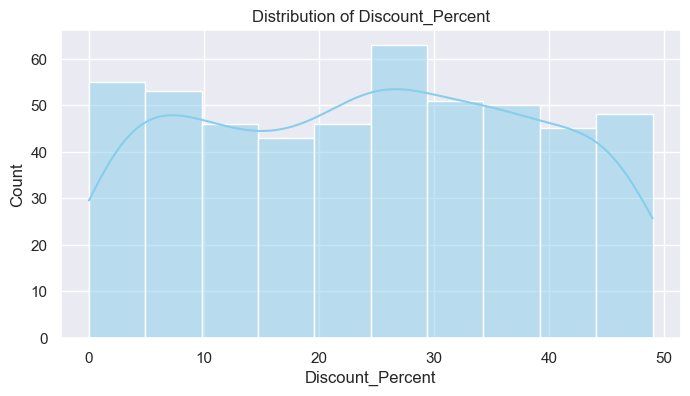

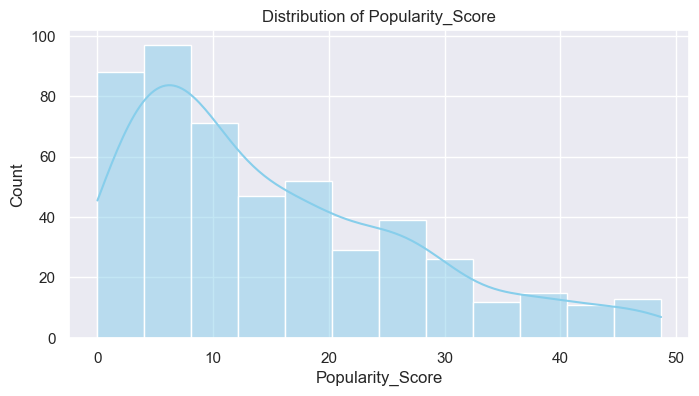

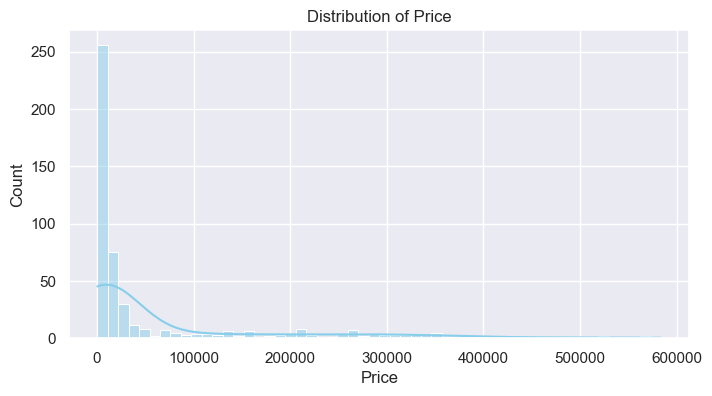

In [237]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


## Categorical Features

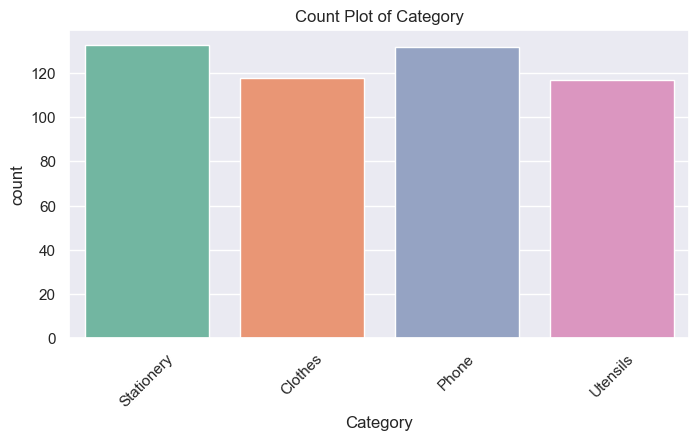

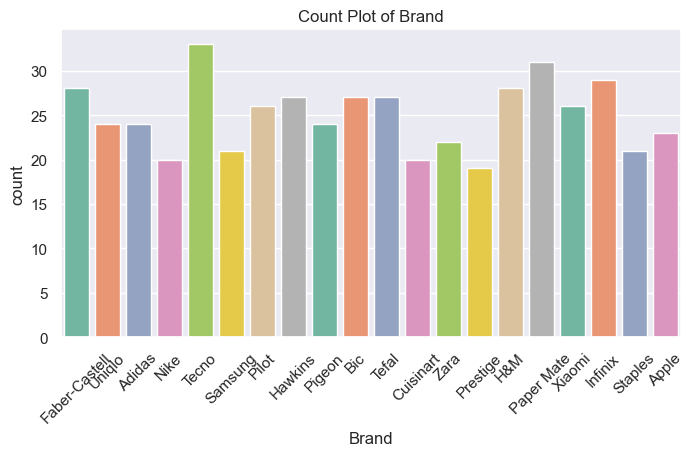

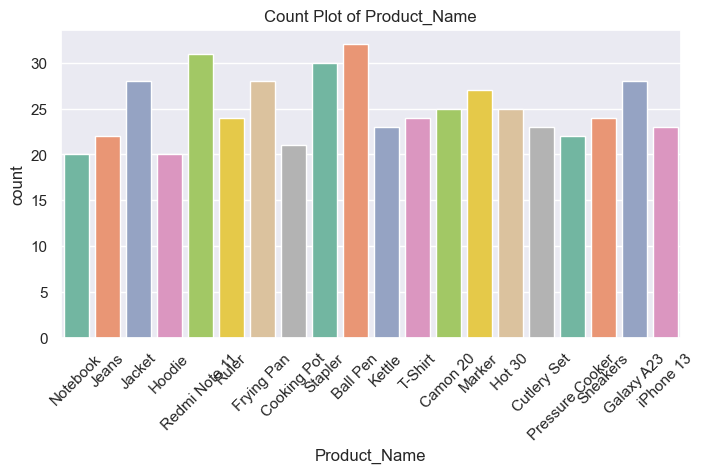

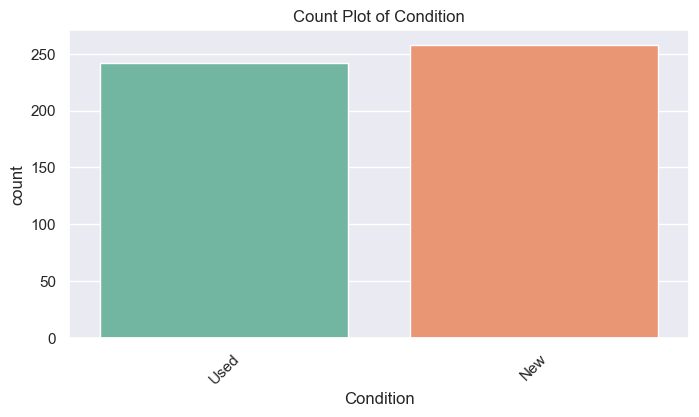

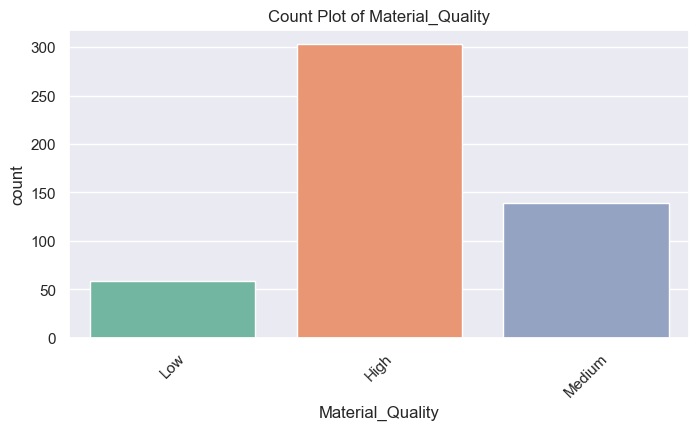

In [239]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue=col, data=df, palette='Set2', legend=False)

    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()



## Bivariate Analysis (Relationship Between Two Features)

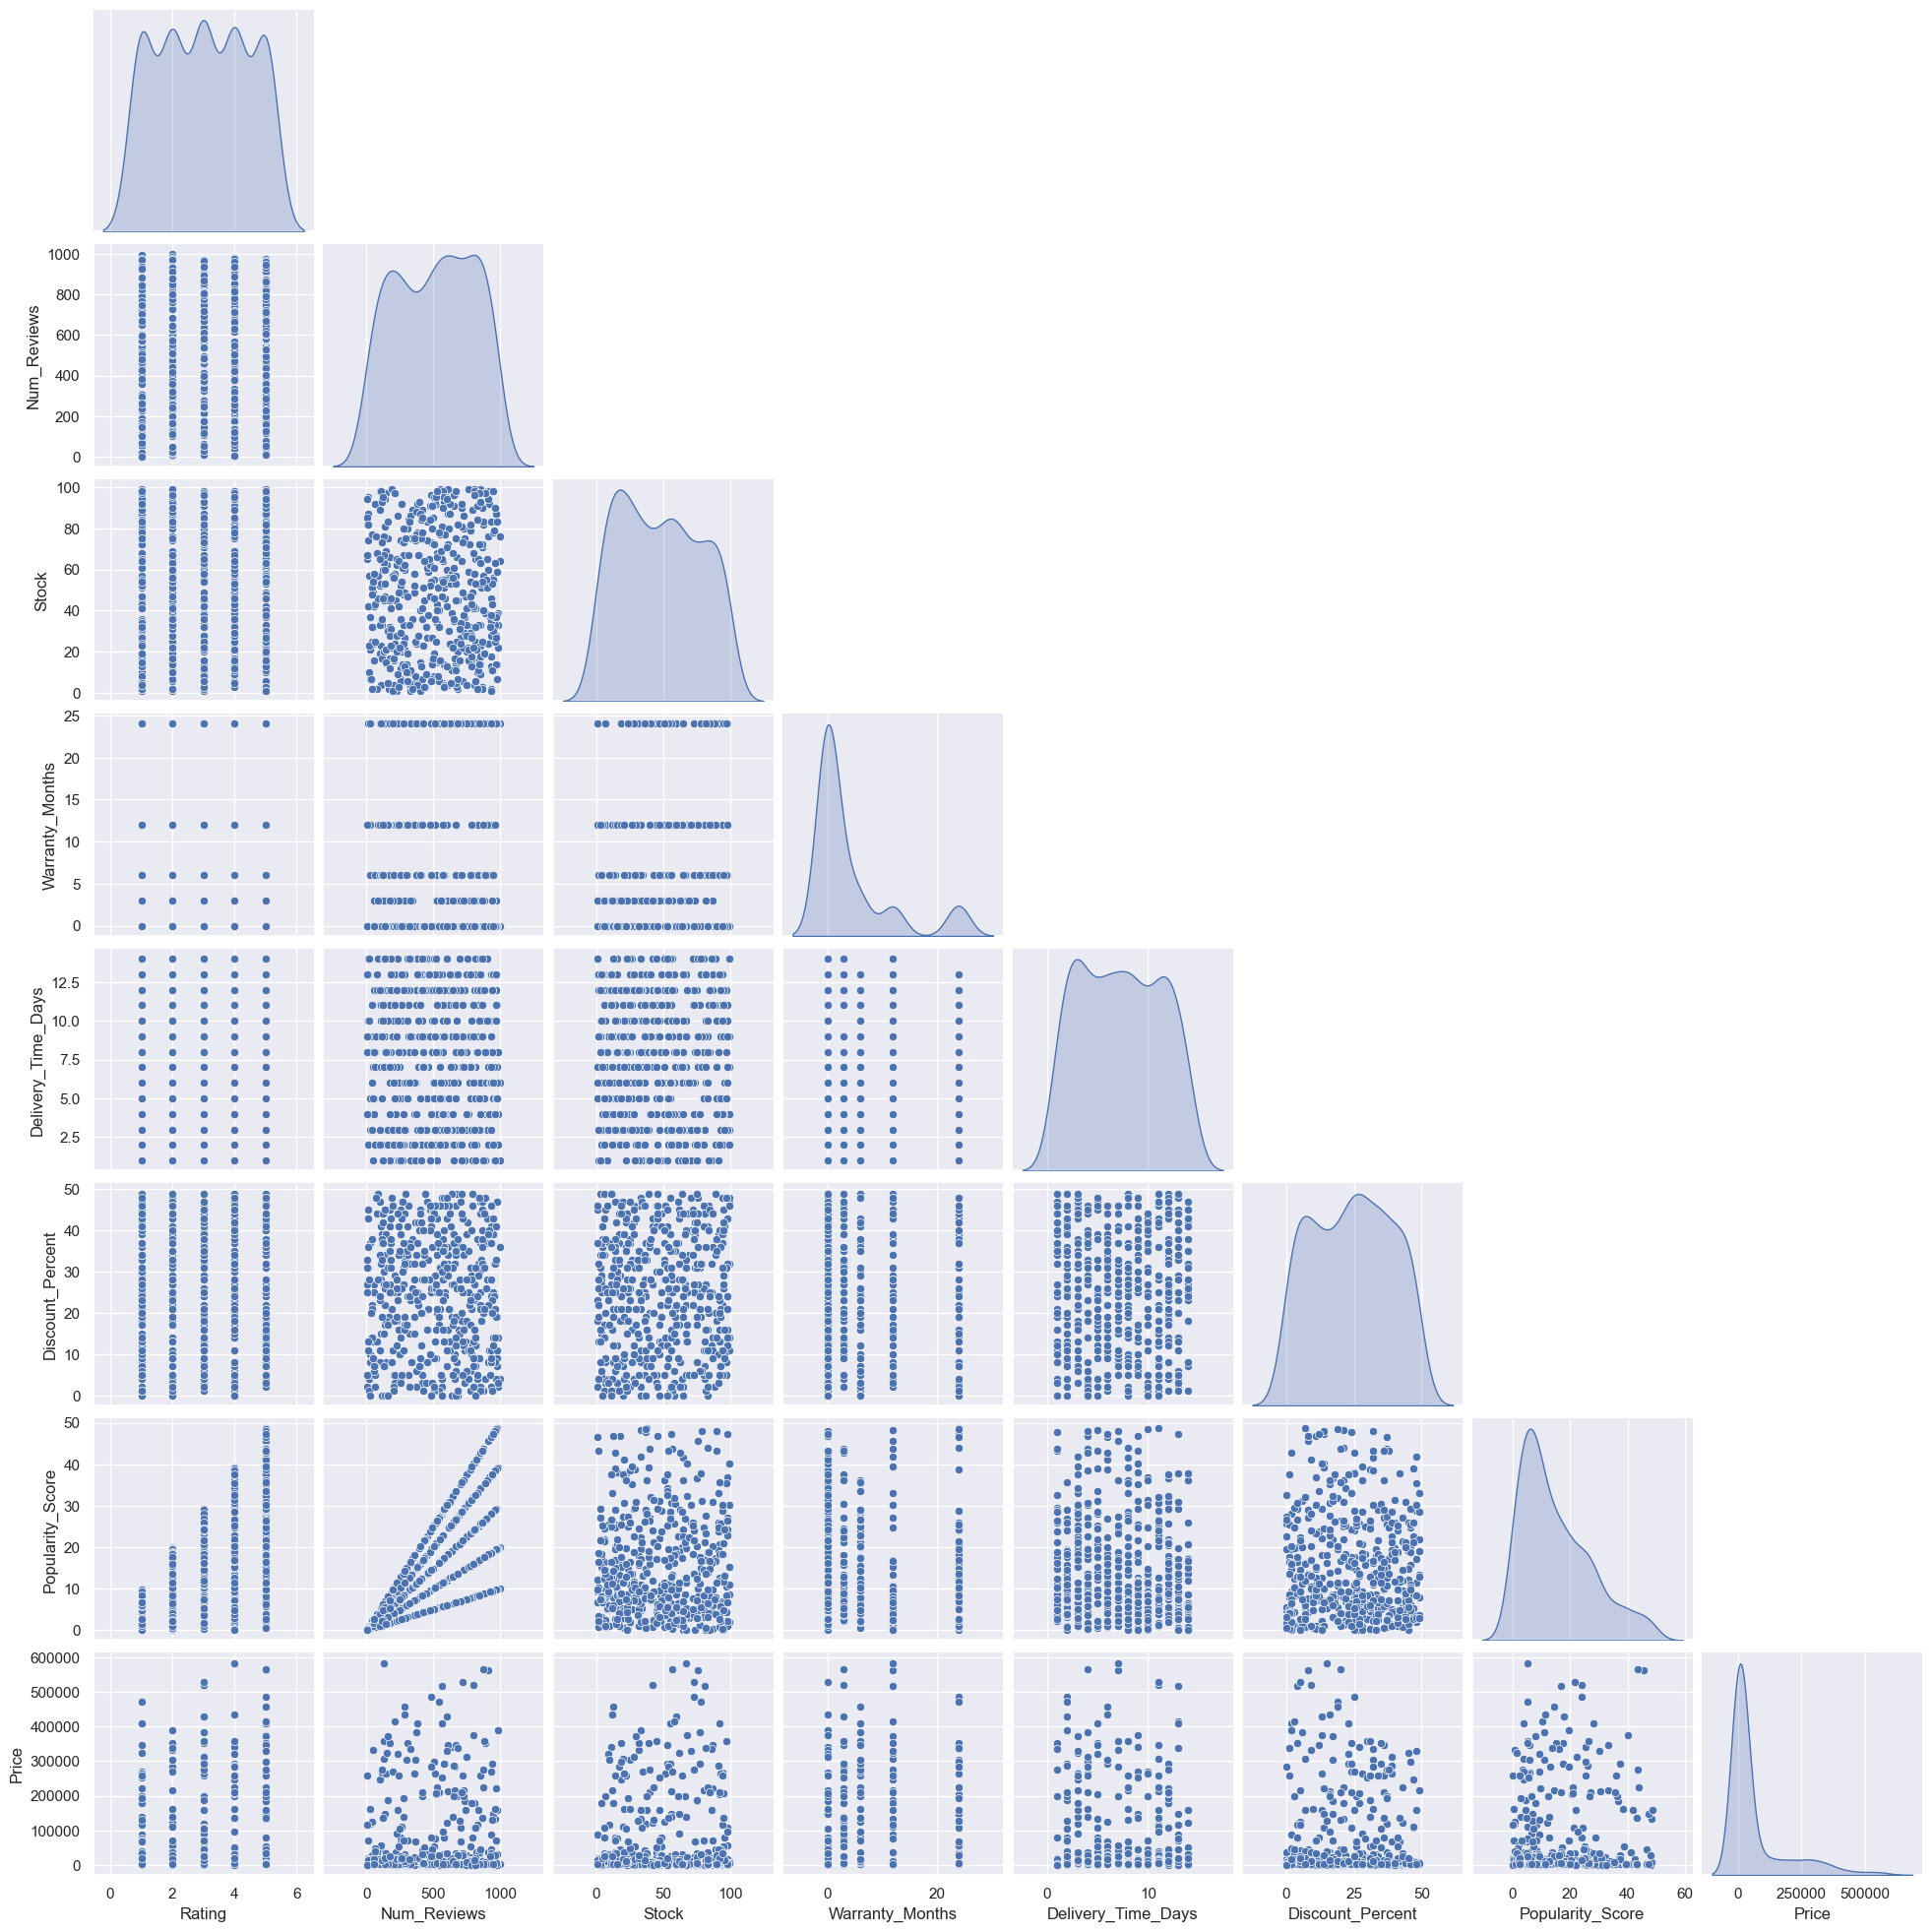

In [242]:
sns.pairplot(df[num_cols], diag_kind='kde', corner=True)
plt.show()


## Correlation Matrix

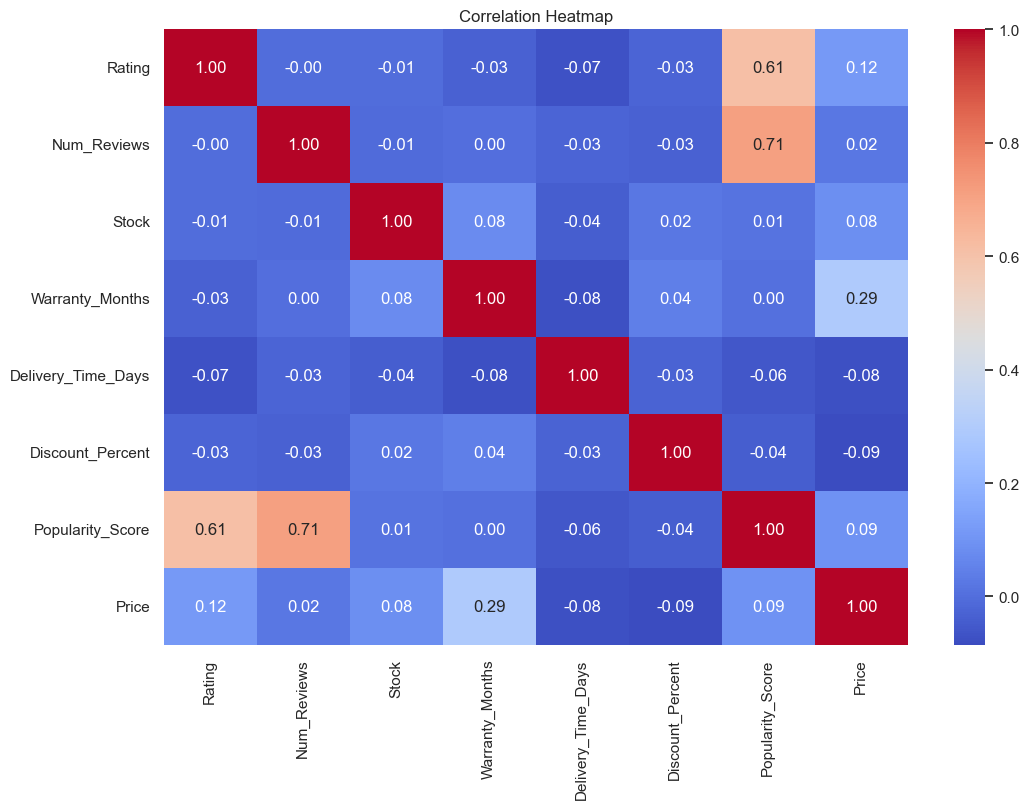

In [245]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Target Variable vs Features

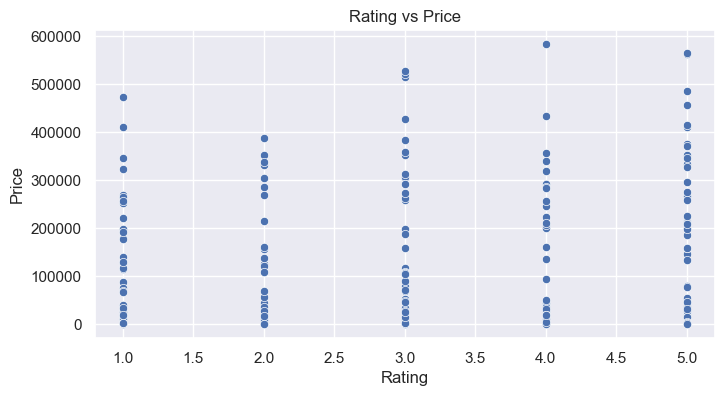

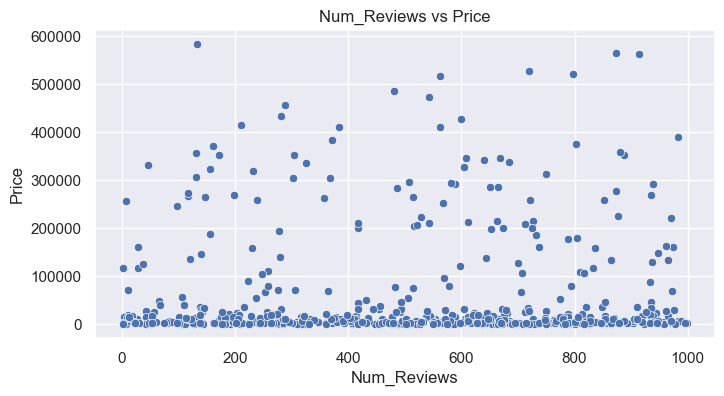

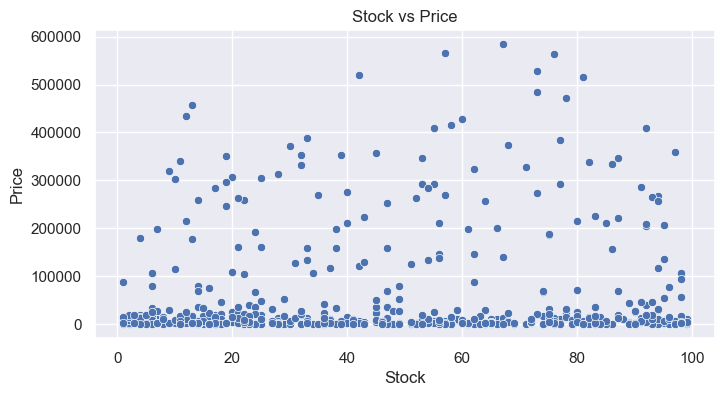

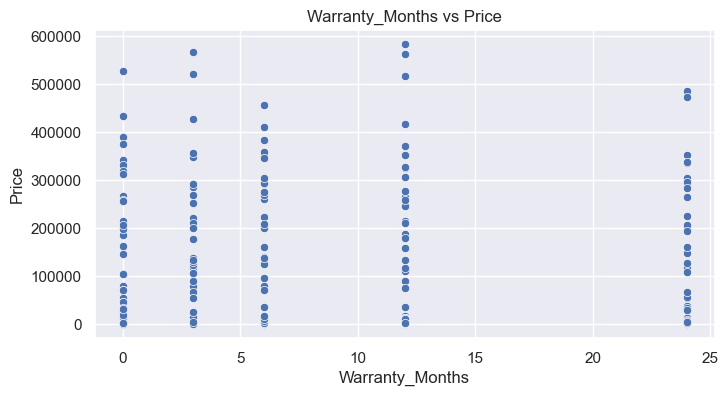

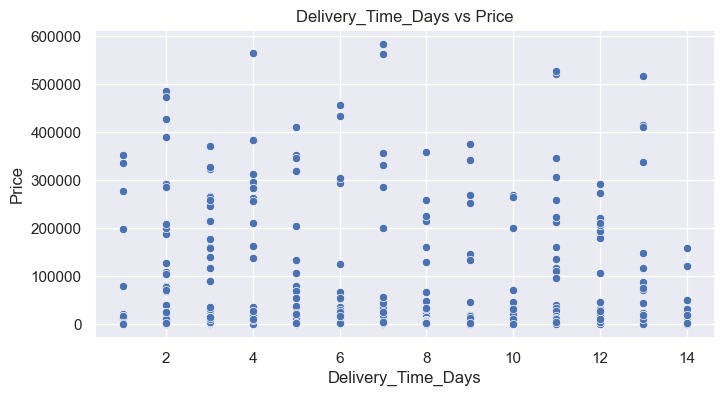

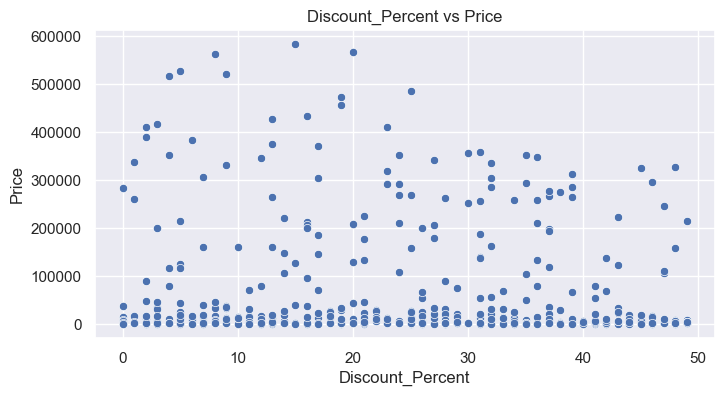

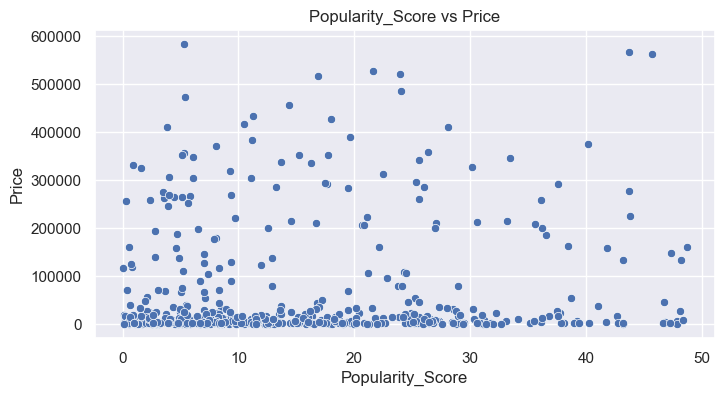

In [247]:
target = 'Price'  # Replace if your target name is different

for col in num_cols:
    if col != target:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f'{col} vs {target}')
        plt.show()


## Summary of EDA Findings

In [ ]:
Which variable has the most significant impact on e-commerce sales?

From the exploratory analysis we did (correlation, scatterplots, logic):

FEATURE	                    IMPACT ON SALES         	DESCRIPTION

Popularity_Score	        Strong Positive	            Popular products sell at higher prices.

Num_Reviews             	Moderate Positive	        Products with more reviews usually have higher sales (but less strong than popularity).

Discount_Percent	        Negative/Weak	            Higher discounts on cheaper products.

Product_Category	        Varies	                    Some categories sell at higher prices.

Outliers	                Present	                    Need to handle before modeling.
   

## Conclusion on EDA

In [ ]:
The exploratory analysis revealed that Popularity_Score is the most significant factor influencing e-commerce sales, followed by Number of Reviews.
Higher popularity and more reviews are associated with better sales performance.

In contrast, Discount_Percent showed little to no positive impact on sales, suggesting that discounts alone are not strong drivers of success in this dataset. 
Outliers and missing values were also identified and must be addressed during model preparation.

Overall, customer engagement and product reputation emerged as key sales drivers, providing a strong foundation for building a predictive model.

## Split Data for Train and Test

In [254]:
X = df.drop("Price", axis=1)  
y = df["Price"]  

In [256]:
from sklearn.model_selection import train_test_split

# Replace X and y with your actual feature and target variables
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


train, test = train_test_split(df, test_size=0.2, random_state=123)


In [258]:
print(df.shape)
print(train.shape)
print(test.shape)

(500, 13)
(400, 13)
(100, 13)


In [260]:
train

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
199,Phone,Apple,Redmi Note 11,5,Used,722,22,High,0,8,36,36.10,258730.50
450,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2482.30
231,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,8585.11
95,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,1971.96
54,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,1434.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Phone,Tecno,Galaxy A23,2,Used,230,86,High,12,14,25,4.60,157871.49
476,Utensils,Cuisinart,Frying Pan,1,New,847,97,High,24,5,48,8.47,1787.39
322,Utensils,Pigeon,Kettle,3,New,836,11,High,6,11,29,25.08,4356.42
382,Clothes,H&M,Jacket,2,New,183,31,Medium,0,7,33,3.66,13125.90


## Reset the train index

In [263]:
train.reset_index(drop=True, inplace=True)

In [265]:
train

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
0,Phone,Apple,Redmi Note 11,5,Used,722,22,High,0,8,36,36.10,258730.50
1,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2482.30
2,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,8585.11
3,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,1971.96
4,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,1434.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Phone,Tecno,Galaxy A23,2,Used,230,86,High,12,14,25,4.60,157871.49
396,Utensils,Cuisinart,Frying Pan,1,New,847,97,High,24,5,48,8.47,1787.39
397,Utensils,Pigeon,Kettle,3,New,836,11,High,6,11,29,25.08,4356.42
398,Clothes,H&M,Jacket,2,New,183,31,Medium,0,7,33,3.66,13125.90


## Check the data type

In [268]:
train.dtypes

Category               object
Brand                  object
Product_Name           object
Rating                  int64
Condition              object
Num_Reviews             int64
Stock                   int64
Material_Quality       object
Warranty_Months         int64
Delivery_Time_Days      int64
Discount_Percent        int64
Popularity_Score      float64
Price                 float64
dtype: object

In [270]:
train.columns

Index(['Category', 'Brand', 'Product_Name', 'Rating', 'Condition', 'Num_Reviews', 'Stock', 'Material_Quality', 'Warranty_Months', 'Delivery_Time_Days', 'Discount_Percent', 'Popularity_Score', 'Price'], dtype='object')

## Check the missing values

In [273]:
train.isnull().sum()

Category              0
Brand                 0
Product_Name          0
Rating                0
Condition             0
Num_Reviews           0
Stock                 0
Material_Quality      0
Warranty_Months       0
Delivery_Time_Days    0
Discount_Percent      0
Popularity_Score      0
Price                 0
dtype: int64

## Check the dupliactes

In [276]:
train.duplicated().sum()

0

## Check and remove the outliers

In [279]:
def drop_outlier(data,var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data = data[data[var] < upper]
    data = data[data[var] > lower]
    data.reset_index(drop=True, inplace=True)
    return data

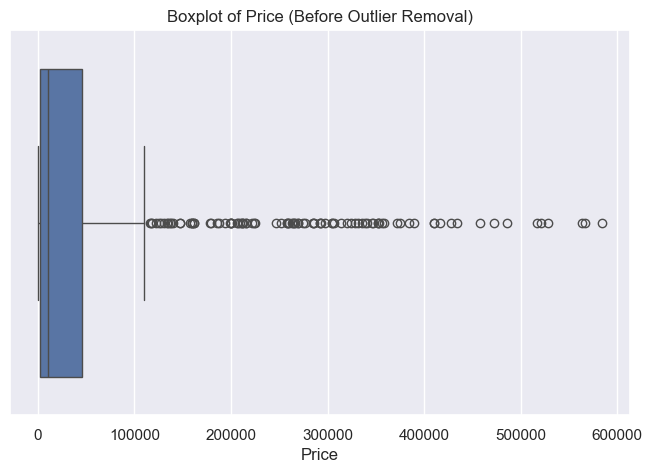

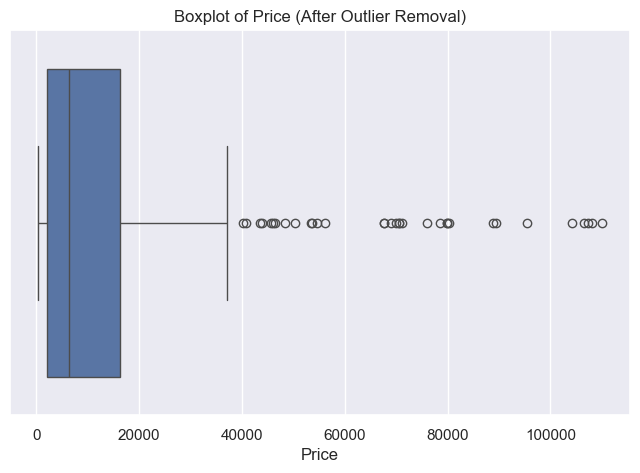

Original rows: 500, Rows after outlier removal: 403


In [281]:
# Plot boxplot for the 'Price' column before removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price (Before Outlier Removal)')
plt.show()

# Compute IQR for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Plot boxplot after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_outliers['Price'])
plt.title('Boxplot of Price (After Outlier Removal)')
plt.show()

# Optional: See how many rows were removed
print(f"Original rows: {len(df)}, Rows after outlier removal: {len(df_no_outliers)}")


In [283]:
train = drop_outlier(train, "Price")

In [285]:
train.shape

(318, 13)

## Split data into features and targets

In [288]:
target = "Price"
X_train = train.drop(target, axis=1)    # Features
y_train = train[target]                 # Target

In [290]:
X_train

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54
...,...,...,...,...,...,...,...,...,...,...,...,...
313,Stationery,Bic,Marker,3,Used,240,42,High,0,8,41,7.20
314,Utensils,Cuisinart,Frying Pan,1,New,847,97,High,24,5,48,8.47
315,Utensils,Pigeon,Kettle,3,New,836,11,High,6,11,29,25.08
316,Clothes,H&M,Jacket,2,New,183,31,Medium,0,7,33,3.66


In [292]:
y_train

0       2482.30
1       8585.11
2       1971.96
3       1434.76
4       4715.80
         ...   
313     2207.48
314     1787.39
315     4356.42
316    13125.90
317     6481.97
Name: Price, Length: 318, dtype: float64

In [294]:
df

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
0,Stationery,Faber-Castell,Notebook,1,Used,102,52,Low,0,11,28,1.02,370.48
1,Clothes,Uniqlo,Jeans,4,Used,372,24,High,0,6,2,14.88,2788.69
2,Clothes,Adidas,Jacket,4,New,276,33,High,0,10,11,11.04,9658.62
3,Clothes,Nike,Hoodie,4,New,58,42,Medium,0,12,27,2.32,2444.37
4,Phone,Tecno,Redmi Note 11,5,Used,562,55,Medium,6,5,2,28.10,410332.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothes,Nike,Jacket,1,Used,264,92,High,0,13,5,2.64,20096.89
496,Stationery,Pilot,Ball Pen,2,Used,575,90,High,0,10,35,11.50,1093.01
497,Stationery,Bic,Stapler,5,New,53,16,High,0,8,7,2.65,1636.19
498,Clothes,H&M,Sneakers,5,New,605,94,High,0,10,11,30.25,32539.61


## Features Engineering

In [297]:
#FE 1.
X_train["Price_per_Review"] = round(y_train / X_train["Num_Reviews"], 2)


In [299]:
X_train.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price_per_Review
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2.82
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,50.21
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,7.83
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,4.43
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54,7.52


In [301]:
#FE 2.
X_train["Discount_Amount"] = round((X_train["Discount_Percent"] / 100) * y_train, 2)

In [303]:
X_train.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price_per_Review,Discount_Amount
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2.82,521.28
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,50.21,3519.90
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,7.83,276.07
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,4.43,215.21
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54,7.52,613.05


In [305]:
#FE 3.
X_train["Popularity_Per_Review"] = round(X_train["Popularity_Score"] / X_train["Num_Reviews"], 2)

In [307]:
X_train.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price_per_Review,Discount_Amount,Popularity_Per_Review
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2.82,521.28,0.02
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,50.21,3519.90,0.01
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,7.83,276.07,0.04
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,4.43,215.21,0.05
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54,7.52,613.05,0.02


In [309]:
X_train.drop(["Num_Reviews"], axis=1, inplace=True)
X_train.drop(["Discount_Percent"], axis=1, inplace=True)


In [311]:
cat_feat = []
for i in X_train.columns:
    if X_train[i].dtypes == "O":
        cat_feat.append(i)

num_feat = []
for i in X_train.columns:
    if X_train[i].dtype == "int64" or X_train[i].dtype == "float64":
        num_feat.append(i)

In [313]:
cat_feat

['Category', 'Brand', 'Product_Name', 'Condition', 'Material_Quality']

In [315]:
num_feat

['Rating',
 'Stock',
 'Warranty_Months',
 'Delivery_Time_Days',
 'Popularity_Score',
 'Price_per_Review',
 'Discount_Amount',
 'Popularity_Per_Review']

<Axes: >

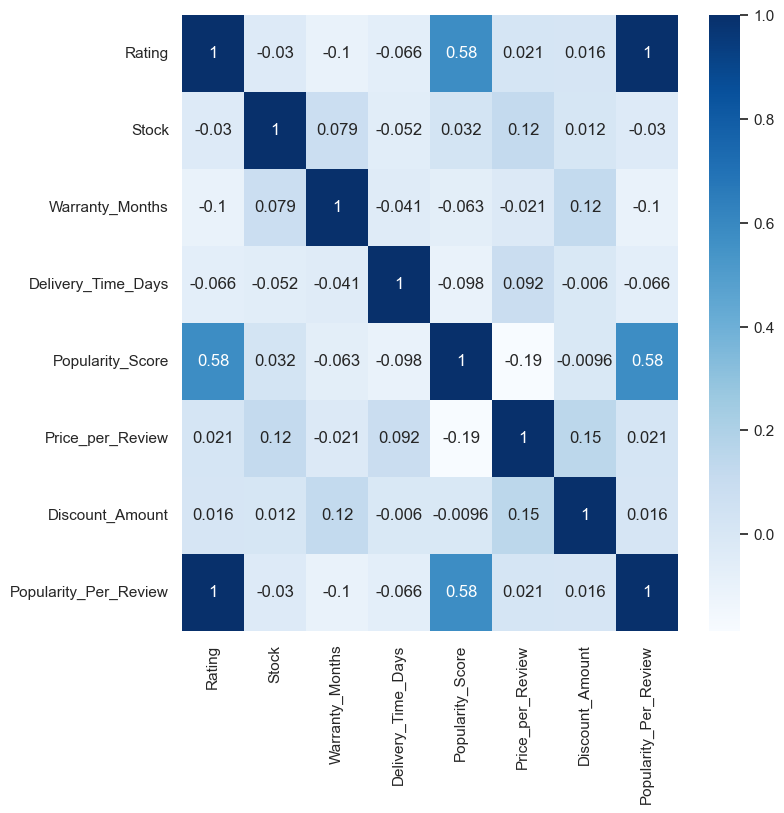

In [317]:
plt.figure(figsize = (8,8))
cors = X_train[num_feat].corr()
sns.heatmap(cors, annot=True, cmap = "Blues")

# Features Encoding

In [320]:
#A12
# If column is ordinal use label encoding (Ordinal encoder)
# If column is norminal use onehotencoding (One Hot encoder)

encoder = OneHotEncoder(drop= "first", dtype=int)

enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat_feat]).toarray())
enc_data.columns = encoder.get_feature_names_out()

X_train = X_train.join(enc_data)

X_train.drop(cat_feat, axis=1, inplace=True)


In [322]:
## To aviod data leakage
X_train.drop("Popularity_Score", axis=1, inplace=True)

## Features Importance

In [325]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = X_train.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
Category_Phone,5.862276e-01
Price_per_Review,2.188514e-01
Discount_Amount,9.526340e-02
Category_Utensils,2.574586e-02
Delivery_Time_Days,2.380105e-02
Warranty_Months,1.585148e-02
Category_Stationery,6.759267e-03
Stock,5.365584e-03
Condition_Used,4.023200e-03
Product_Name_Jacket,2.748563e-03


In [327]:
res = coef.to_frame()
res.head(5).index

Index(['Category_Phone', 'Price_per_Review', 'Discount_Amount', 'Category_Utensils', 'Delivery_Time_Days'], dtype='object')

In [329]:
top_5 = ['Category_Phone', 'Price_per_Review', 'Discount_Amount', 'Category_Utensils', 'Delivery_Time_Days']

In [331]:
X_train_n = X_train[top_5]

In [333]:
X_train_n

,Category_Phone,Price_per_Review,Discount_Amount,Category_Utensils,Delivery_Time_Days
0,0,2.82,521.28,0,5
1,0,50.21,3519.90,0,11
2,0,7.83,276.07,0,8
3,0,4.43,215.21,0,8
4,0,7.52,613.05,1,11
...,...,...,...,...,...
313,0,9.20,905.07,0,8
314,0,2.11,857.95,1,5
315,0,5.21,1263.36,1,11
316,0,71.73,4331.55,0,7


In [335]:
def prepare(d):
    
    d.reset_index(drop=True, inplace=True)

    d = drop_outlier(d, "Price")
    
    target = "Price"
    X_d = d.drop(target, axis=1)    # Features
    y_d = d[target]   

    if "Num_Reviews" in X_d.columns:
        X_d["Price_per_Review"] = round(y_d / X_d["Num_Reviews"], 2)

    if "Discount_Percent" in X_d.columns:
        X_d["Discount_Amount"] = round((X_d["Discount_Percent"] / 100) * y_d, 2)

    if "Popularity_Score" in X_d.columns and "Num_Reviews" in X_d.columns:
        X_d["Popularity_Per_Review"] = round(X_d["Popularity_Score"] / X_d["Num_Reviews"], 2)

    X_d.drop(["Num_Reviews"], axis=1, inplace=True)
    X_d.drop(["Discount_Percent"], axis=1, inplace=True)

    
    encoder = OneHotEncoder(drop= "first", dtype=int)

    enc_data = pd.DataFrame(encoder.fit_transform(X_d[cat_feat]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    X_d = X_d.join(enc_data)

    X_d.drop(cat_feat, axis=1, inplace=True)

    X_d.drop("Popularity_Score", axis=1, inplace=True)

    X_d_n = X_d[top_5]

    return X_d_n, y_d

In [337]:
X_test, y_test = prepare(test)

In [339]:
#Write a function for multiple model selection
def model_to_use(input_ml_algo):
  if input_ml_algo == 'DT':
     model = DecisionTreeRegressor()
  elif input_ml_algo == 'RF':
     model = RandomForestRegressor()
  elif input_ml_algo == 'XGBC':
     model = XGBRegressor()
  elif input_ml_algo=='LR':
     model=LinearRegression()
  elif input_ml_algo=='KNN':
    model=KNeighborsRegressor()
  elif input_ml_algo=='GBR':
     model= GradientBoostingRegressor()
  return model

def evaluate(model):
  y_train_pred = model.predict(X_train_n) #Train (Already seen this)
  y_pred = model.predict(X_test)
  print('Train r2 score: ', r2_score(y_train,y_train_pred))
  print('Test r2 score: ', r2_score(y_test, y_pred))

  print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
  print('test_mse1: ', mean_squared_error(y_test,y_pred))
  plt.subplots(figsize=(8,5))
  plt.scatter(y_test,y_pred)
  plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))
  (np.unique(y_test)),c='r')
  plt.title('Predicted vs Actual')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.grid()
  plt.show()


Train r2 score:  1.0
Test r2 score:  0.7388599482707308
train_mse1:  0.0
test_mse1:  191820049.6248378


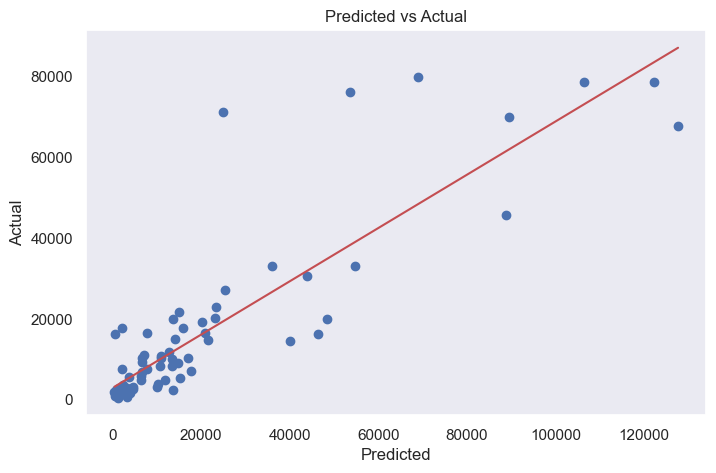

In [341]:
model1 = model_to_use("DT")
model1.fit(X_train_n, y_train)
evaluate(model1)

Train r2 score:  0.9652684592325418
Test r2 score:  0.7498132143391465
train_mse1:  8748324.452871101
test_mse1:  183774343.77893502


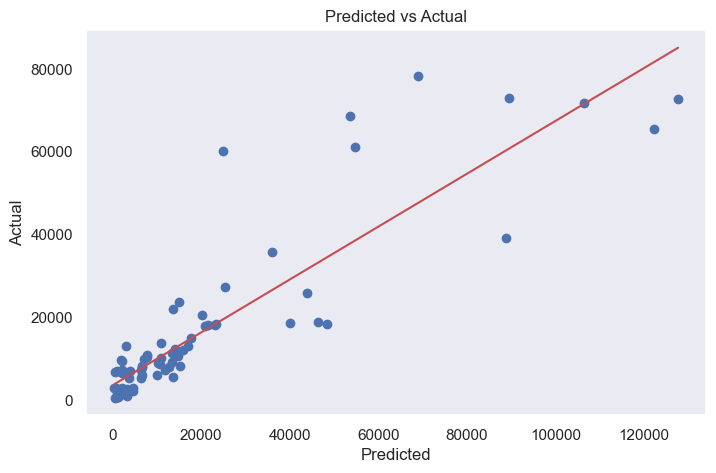

In [343]:
model2 = model_to_use("RF")
model2.fit(X_train_n, y_train)
evaluate(model2)

Train r2 score:  0.9999826439292673
Test r2 score:  0.6875316743721619
train_mse1:  4371.719038132204
test_mse1:  229523159.43576849


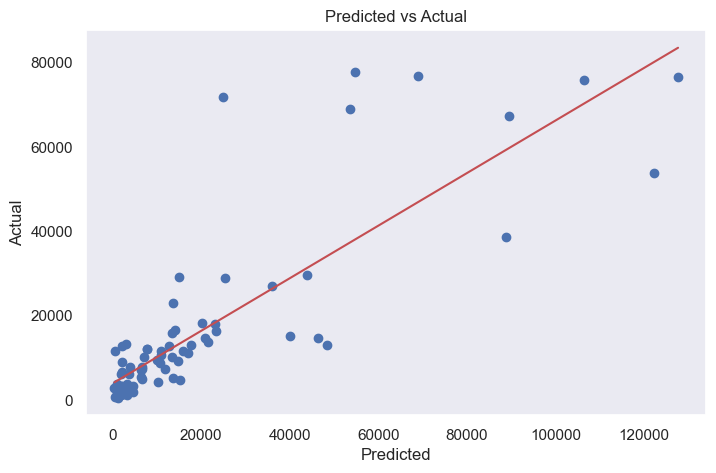

In [345]:
model3 = model_to_use("XGBC")
model3.fit(X_train_n, y_train)
evaluate(model3)

Train r2 score:  0.7438606705670356
Test r2 score:  0.7652623955983306
train_mse1:  64517436.010783754
test_mse1:  172426169.89225706


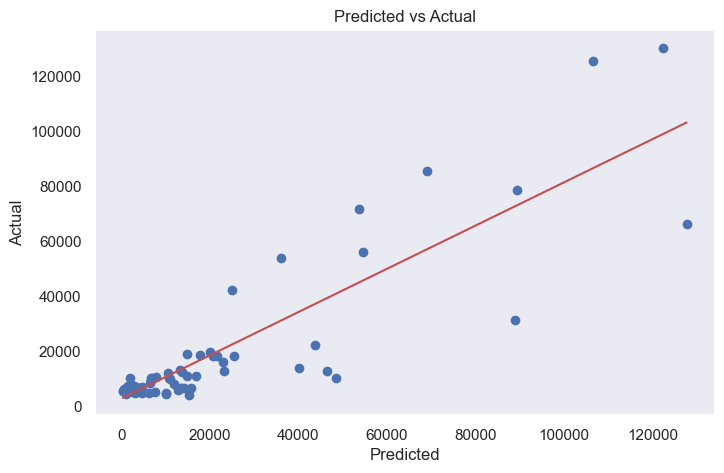

In [347]:
model4 = model_to_use("LR")
model4.fit(X_train_n, y_train)
evaluate(model4)

Train r2 score:  0.7407422981328173
Test r2 score:  0.6827023888316577
train_mse1:  65302904.585359395
test_mse1:  233070504.1877424


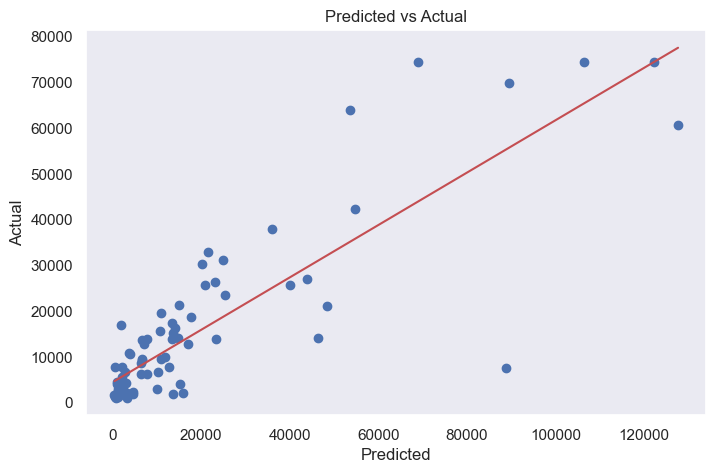

In [349]:
model5 = model_to_use("KNN")
model5.fit(X_train_n, y_train)
evaluate(model5)

Train r2 score:  0.9634120836120313
Test r2 score:  0.7294520960749006
train_mse1:  9215916.038955929
test_mse1:  198730573.93207115


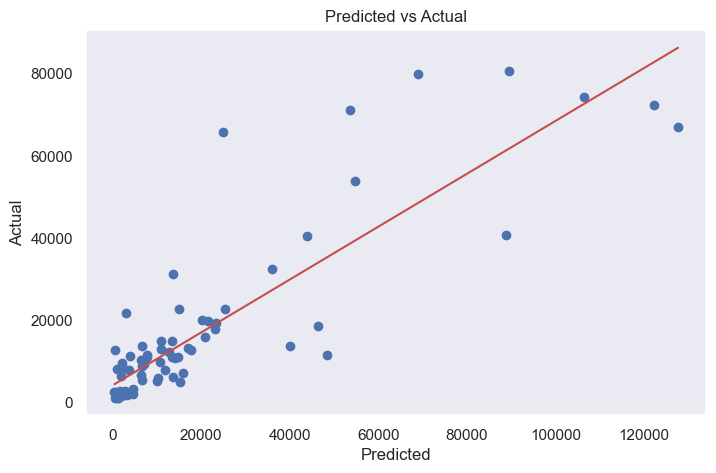

In [351]:
model6 = model_to_use("GBR")
model6.fit(X_train_n, y_train)
evaluate(model6)

## Conclusion:

In [ ]:
In this project, I developed an integrated machine learning framework for e-commerce price prediction and usability analysis using feature selection techniques.

Six machine learning models were evaluated and compared:

1. Decision Tree Regressor (DT) achieved a perfect Train R² score of 1.0, but its Test R² score dropped to 0.73, indicating significant overfitting despite a training 
   error (MSE) of 0.0.

2. Random Forest Regressor (RF) provided a more balanced performance, with a Train R² of 0.96 and an improved Test R² of 0.75, along with lower test MSE, suggesting better
   generalization to unseen data.

3. XGBoost Regressor (XGBC) fit the training data almost perfectly (Train R² ≈ 1.0), but showed the lowest Test R² (0.69), revealing clear overfitting.

4. Linear Regression (LR) demonstrated moderate fitting, with a Train R² of 0.74 and the highest Test R² of 0.77 among all models, making it a surprisingly strong baseline.

5. K-Nearest Neighbors Regressor (KNN) had a Train R² of 0.74 and a Test R² of 0.68, reflecting weaker performance and higher test MSE compared to ensemble models.

6. Gradient Boosting Regressor (GBR) achieved strong training performance (Train R² = 0.96) but a slightly lower Test R² (0.73) than RF, indicating some level of overfitting
   but still relatively good generalization.

Overall Insights:
a. Random Forest (RF) consistently performed well across both training and test data, maintaining a balance between accuracy and generalization.

b. Linear Regression (LR) showed surprisingly strong results, suggesting that after feature selection, the relationship between features and price might be fairly linear.

c. Ensemble models (RF, GBR) generally outperformed simpler methods like KNN, emphasizing the importance of model complexity for capturing feature interactions.

# Recommendation:

In [ ]:
Thus, Random Forest is recommended as the core model for the integrated machine learning framework,
                                                    
providing reliable price prediction while maintaining usability across different e-commerce datasets.

Further improvements could include hyperparameter tuning, cross-validation, and additional feature

engineering to enhance model robustness and prediction accuracy.